<a href="https://colab.research.google.com/github/srujayreddyv/CSC219-P4-MultiModalAttentionNetworks/blob/main/CSC219TeamProject_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 219- Machine Learning (Fall 2023)

# Project 4: Multi-Modal Co-Attention Network for Fake News Detection

Team Challengers:
1. Alekya Paladugu
2. Samah Eltayeb
3. Srujay Reddy

The goal of this project is to build a 2-way classification deep learning model with two inputs and one output using TensorFlow Functional API.

[link to the dataset](https://github.com/entitize/Fakeddit)


# 1. 0 UPLOADING THE DATASET

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.0 IMPORTS

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import collections
from scipy.stats import zscore
from sklearn import preprocessing
import matplotlib.pyplot as plt
import shutil
import os
%matplotlib inline
import datetime

from sklearn.metrics import roc_curve, auc#
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure, show


from sklearn import metrics
import tensorflow as tf
from keras.layers import Dense, Activation,Bidirectional
from keras.callbacks import EarlyStopping # to prevent overfitting
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

from keras import optimizers
%load_ext tensorboard

# Multiple Inputs
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import concatenate

# 3.0 DATA PREPROCESSING

In [ ]:
#Dataset_tsv = 'multimodal_train.tsv'

Dataset_tsv = '/content/drive/MyDrive/Colab Notebooks/CSC219-MachineLearning/project4/multimodal_only_samples/multimodal_train.tsv'

df= pd.read_csv(Dataset_tsv, sep='\t', na_values=['NA','?'])
df = df[0:320]
df

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,Alexithymia,my walgreens offbrand mucinex was engraved wit...,1551641244,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0
1,prometheus1123,hackers leak emails from uae ambassador to us,1496510798,aljazeera.com,True,6f2cy5,https://external-preview.redd.it/6fNhdbc6K1vFA...,NaN,1.0,44,neutralnews,Hackers leak emails from UAE ambassador to US,0.92,1,0,0
2,NaN,puppy taking in the view,1471341090,i.imgur.com,True,4xypkv,https://external-preview.redd.it/HLtVNhTR6wtYt...,NaN,26.0,250,photoshopbattles,PsBattle: Puppy taking in the view,0.95,1,0,0
3,CrimsonBlue90,bride and groom exchange vows after fatal shoo...,1423681227,independent.ie,True,2vkbtj,https://external-preview.redd.it/FQ-J9OIPFRpqi...,NaN,7.0,6,nottheonion,Bride and groom exchange vows after fatal shoo...,0.64,1,0,0
4,happenpupe,major thermos,1495659846,i.redd.it,True,6d50rl,https://preview.redd.it/l9gvkkf3jizy.jpg?width...,NaN,0.0,2,pareidolia,major thermos,0.67,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,NaN,british red cross raises over m during manches...,1496619274,hollywoodreporter.com,True,6falcq,https://external-preview.redd.it/DEHnQjhhySCjf...,NaN,2.0,66,upliftingnews,British Red Cross Raises Over $3M During Manch...,0.91,1,0,0
316,akgnz,giant cat in the fields,1494772879,i.imgur.com,True,6b47j6,https://external-preview.redd.it/SPXMQeywtUjPx...,NaN,3.0,251,confusing_perspective,Giant cat in the fields,0.89,0,2,2
317,cbecker111,the inside temp of our rd floor building ceili...,1563577894,i.redd.it,True,cfeous,https://preview.redd.it/tfti9kjbecb31.jpg?widt...,NaN,2.0,17,mildlyinteresting,The inside temp of our 3rd floor building ceil...,0.85,1,0,0
318,200201552,man hugging his displeased dog,1482216265,i.redd.it,True,5jbucs,https://preview.redd.it/u35w1ogb4o4y.jpg?width...,NaN,6.0,29,photoshopbattles,PsBattle: Man hugging his displeased dog,0.76,1,0,0


In [ ]:
df.isnull().sum()

author                   11
clean_title               0
created_utc               0
domain                   92
hasImage                  0
id                        0
image_url                 0
linked_submission_id    228
num_comments             92
score                     0
subreddit                 0
title                     0
upvote_ratio             92
2_way_label               0
3_way_label               0
6_way_label               0
dtype: int64

In [ ]:
df.dropna(subset=['image_url'] ,inplace=True)
df.isnull().sum()

author                   11
clean_title               0
created_utc               0
domain                   92
hasImage                  0
id                        0
image_url                 0
linked_submission_id    228
num_comments             92
score                     0
subreddit                 0
title                     0
upvote_ratio             92
2_way_label               0
3_way_label               0
6_way_label               0
dtype: int64

In [ ]:
# Test Data
#Dataset_test_tsv = 'multimodal_validate.tsv'

Dataset_test_tsv = '/content/drive/MyDrive/Colab Notebooks/CSC219-MachineLearning/project4/multimodal_only_samples/multimodal_validate.tsv'

df_test= pd.read_csv(Dataset_test_tsv, sep='\t', na_values=['NA','?'])
df_test = df_test[0:431]
df_test

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,singingdart7854,my xbox controller says hi,1567435668,i.redd.it,True,cypw96,https://preview.redd.it/l0ga0tug17k31.jpg?widt...,NaN,4.0,25,mildlyinteresting,My Xbox controller says hi,0.72,1,0,0
1,mandal0re,new image from the mandalorian,1567744981,i.imgur.com,True,d0bzlq,https://external-preview.redd.it/VX7bXDu9Gl8UZ...,NaN,5.0,21,photoshopbattles,PsBattle: New image from The Mandalorian,0.92,1,0,0
2,HE_WHO_DRUELS,say hello to my little friend,1461468065,NaN,True,d2ezoob,http://i.imgur.com/F1Zbl3D.jpg,4g6bp9,NaN,10,psbattle_artwork,Say hello to my little friend!,NaN,0,2,4
3,eNaRDe,watch your step little one,1408047097,NaN,True,cjqctpw,http://i.imgur.com/KRyMjn1.jpg,2diyh3,NaN,1,psbattle_artwork,Watch your step little one,NaN,0,2,4
4,Thebubster2001,this tree i found with a solo cup on it,1558185880,i.redd.it,True,bq3yuk,https://preview.redd.it/bxp58zf01zy21.jpg?widt...,NaN,8.0,6,mildlyinteresting,This tree I found with a solo cup on it,0.62,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,ITS_JUST_2015_BRO,guys girl and a cocktail,1486035744,i.redd.it,True,5rma0a,https://preview.redd.it/4uougwvklfdy.jpg?width...,NaN,130.0,3660,pareidolia,2 guys 1 girl and a cocktail,0.90,0,2,2
427,FIshbanana,first thing i though of,1327883185,NaN,True,c3lwjp1,http://i.imgur.com/sZTgk.jpg,p1p6n,NaN,0,psbattle_artwork,First thing I though of...,NaN,0,2,4
428,TheBlazingPhoenix,no one started the battle im disappointed,1399204752,NaN,True,ch96p3e,http://i.imgur.com/RDLAOsX.jpg,24npy4,NaN,25,psbattle_artwork,No one started the battle? I'm disappointed,NaN,0,2,4
429,timhortonsofficial,another night on mars the maine,1522051601,i.redd.it,True,877ghu,https://preview.redd.it/mymjl64ze2o01.png?widt...,NaN,1.0,6,fakealbumcovers,Another Night On Mars - The Maine,0.88,0,2,1


In [ ]:
df_test.isnull().sum()

author                   23
clean_title               0
created_utc               0
domain                  129
hasImage                  0
id                        0
image_url                 0
linked_submission_id    302
num_comments            129
score                     0
subreddit                 0
title                     0
upvote_ratio            129
2_way_label               0
3_way_label               0
6_way_label               0
dtype: int64

# 3.1 SELECTING ONLY NEEDED COLUMNS

In [ ]:
df_new = df[['clean_title', 'id', 'image_url', '2_way_label']]
df_new

,clean_title,id,image_url,2_way_label
0,my walgreens offbrand mucinex was engraved wit...,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,1
1,hackers leak emails from uae ambassador to us,6f2cy5,https://external-preview.redd.it/6fNhdbc6K1vFA...,1
2,puppy taking in the view,4xypkv,https://external-preview.redd.it/HLtVNhTR6wtYt...,1
3,bride and groom exchange vows after fatal shoo...,2vkbtj,https://external-preview.redd.it/FQ-J9OIPFRpqi...,1
4,major thermos,6d50rl,https://preview.redd.it/l9gvkkf3jizy.jpg?width...,0
...,...,...,...,...
315,british red cross raises over m during manches...,6falcq,https://external-preview.redd.it/DEHnQjhhySCjf...,1
316,giant cat in the fields,6b47j6,https://external-preview.redd.it/SPXMQeywtUjPx...,0
317,the inside temp of our rd floor building ceili...,cfeous,https://preview.redd.it/tfti9kjbecb31.jpg?widt...,1
318,man hugging his displeased dog,5jbucs,https://preview.redd.it/u35w1ogb4o4y.jpg?width...,1


In [ ]:
df_test_new = df_test[['clean_title', 'id', 'image_url', '2_way_label']]
df_test_new[0:10]

,clean_title,id,image_url,2_way_label
0,my xbox controller says hi,cypw96,https://preview.redd.it/l0ga0tug17k31.jpg?widt...,1
1,new image from the mandalorian,d0bzlq,https://external-preview.redd.it/VX7bXDu9Gl8UZ...,1
2,say hello to my little friend,d2ezoob,http://i.imgur.com/F1Zbl3D.jpg,0
3,watch your step little one,cjqctpw,http://i.imgur.com/KRyMjn1.jpg,0
4,this tree i found with a solo cup on it,bq3yuk,https://preview.redd.it/bxp58zf01zy21.jpg?widt...,1
5,this cat out of a box,en2chek,https://i.imgur.com/ApENEGk.jpg,0
6,dude id feel the same if i got a pole through ...,8rsoq0,https://preview.redd.it/ipfrolruml411.jpg?widt...,0
7,is it time for oktoberfest already,ccewep5,http://i.imgur.com/GNoPRww.jpg,0
8,japanese black pine tree,33sekv,https://external-preview.redd.it/FPz_jid8GIOdf...,1
9,just bit into a large grape that ended up bein...,cl7zfa,https://preview.redd.it/5n8yaso6x2e31.jpg?widt...,1


In [ ]:
df_new.shape

(320, 4)

In [ ]:
df_test_new.shape

(431, 4)

# 3.2 DATA AND TARGET VARIABLES MAPPING

In [ ]:
x_train = df_new.drop(["2_way_label"], axis=1)
x_train

,clean_title,id,image_url
0,my walgreens offbrand mucinex was engraved wit...,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...
1,hackers leak emails from uae ambassador to us,6f2cy5,https://external-preview.redd.it/6fNhdbc6K1vFA...
2,puppy taking in the view,4xypkv,https://external-preview.redd.it/HLtVNhTR6wtYt...
3,bride and groom exchange vows after fatal shoo...,2vkbtj,https://external-preview.redd.it/FQ-J9OIPFRpqi...
4,major thermos,6d50rl,https://preview.redd.it/l9gvkkf3jizy.jpg?width...
...,...,...,...
315,british red cross raises over m during manches...,6falcq,https://external-preview.redd.it/DEHnQjhhySCjf...
316,giant cat in the fields,6b47j6,https://external-preview.redd.it/SPXMQeywtUjPx...
317,the inside temp of our rd floor building ceili...,cfeous,https://preview.redd.it/tfti9kjbecb31.jpg?widt...
318,man hugging his displeased dog,5jbucs,https://preview.redd.it/u35w1ogb4o4y.jpg?width...


In [ ]:
y_train = df_new['2_way_label']
y_train

0      1
1      1
2      1
3      1
4      0
      ..
315    1
316    0
317    1
318    1
319    0
Name: 2_way_label, Length: 320, dtype: int64

In [ ]:
x_test = df_test_new.drop(['2_way_label'], axis=1)
x_test

,clean_title,id,image_url
0,my xbox controller says hi,cypw96,https://preview.redd.it/l0ga0tug17k31.jpg?widt...
1,new image from the mandalorian,d0bzlq,https://external-preview.redd.it/VX7bXDu9Gl8UZ...
2,say hello to my little friend,d2ezoob,http://i.imgur.com/F1Zbl3D.jpg
3,watch your step little one,cjqctpw,http://i.imgur.com/KRyMjn1.jpg
4,this tree i found with a solo cup on it,bq3yuk,https://preview.redd.it/bxp58zf01zy21.jpg?widt...
...,...,...,...
426,guys girl and a cocktail,5rma0a,https://preview.redd.it/4uougwvklfdy.jpg?width...
427,first thing i though of,c3lwjp1,http://i.imgur.com/sZTgk.jpg
428,no one started the battle im disappointed,ch96p3e,http://i.imgur.com/RDLAOsX.jpg
429,another night on mars the maine,877ghu,https://preview.redd.it/mymjl64ze2o01.png?widt...


In [ ]:
y_test = df_test_new['2_way_label']
y_test

0      1
1      1
2      0
3      0
4      1
      ..
426    0
427    0
428    0
429    0
430    1
Name: 2_way_label, Length: 431, dtype: int64

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 3), (431, 3), (320,), (431,))

# 3.3 PREPROCESSING TEXT INPUT

In [ ]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [ ]:
x_train['clean_title']

0      my walgreens offbrand mucinex was engraved wit...
1          hackers leak emails from uae ambassador to us
2                               puppy taking in the view
3      bride and groom exchange vows after fatal shoo...
4                                          major thermos
                             ...                        
315    british red cross raises over m during manches...
316                              giant cat in the fields
317    the inside temp of our rd floor building ceili...
318                       man hugging his displeased dog
319                                                 maam
Name: clean_title, Length: 320, dtype: object

In [ ]:
import re

text = ' '.join(x_train['clean_title'])
text = text.split()
freq_comm = pd.Series(text).value_counts()
rare = freq_comm[freq_comm.values == 1]

def get_clean_text(x):
    if type(x) is str:
        x = x.lower()
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        x = re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x)
        x = re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x)
        x = re.sub('RT', "", x)
        x = re.sub('[^A-Z a-z]+', '', x)
        x = ' '.join([t for t in x.split() if t not in rare])
        return x
    else:
        return x

x_train['clean_title'] = x_train['clean_title'].apply(lambda x: get_clean_text(x))

In [ ]:
x_train['clean_title']

0      my mucinex was with the mucinex but in a order
1                                          from to us
2                                  taking in the view
3                                and after at wedding
4                                               major
                            ...                      
315                            red over m during to m
316                                  giant cat in the
317                         the inside of our ceiling
318                                       man his dog
319                                                  
Name: clean_title, Length: 320, dtype: object

In [ ]:
text = x_train['clean_title'].tolist()
text[:3]

['my mucinex was with the mucinex but in a order',
 'from to us',
 'taking in the view']

In [ ]:
token = Tokenizer()
token.fit_on_texts(text)

In [ ]:
vocab_size  = len(token.word_index) + 1
vocab_size

270

In [ ]:
encoded_text = token.texts_to_sequences(text)

In [ ]:
print(encoded_text[:3])


[[8, 119, 18, 9, 1, 119, 80, 5, 2, 81], [28, 4, 31], [120, 5, 1, 82]]


In [ ]:
max_length = 120
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [ ]:
X.shape

(320, 120)

In [ ]:
Y = y_train

In [ ]:
Y.shape

(320,)

In [ ]:
import re

text = ' '.join(x_test['clean_title'])
text = text.split()
freq_comm = pd.Series(text).value_counts()
rare = freq_comm[freq_comm.values == 1]

def get_clean_text(x):
    if type(x) is str:
        x = x.lower()
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        x = re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x)
        x = re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x)
        x = re.sub('RT', "", x)
        x = re.sub('[^A-Z a-z]+', '', x)
        x = ' '.join([t for t in x.split() if t not in rare])
        return x
    else:
        return x

x_test['clean_title'] = x_test['clean_title'].apply(lambda x: get_clean_text(x))

In [ ]:
x_test['clean_title']

0                                     my says hi
1                             new image from the
2                  say hello to my little friend
3                                your little one
4                 this tree i found with a on it
                         ...                    
426                              guys girl and a
427                             first thing i of
428                   no one the im disappointed
429                                 night on the
430    fight north law from raising minimum wage
Name: clean_title, Length: 431, dtype: object

In [ ]:
text_test = x_test['clean_title'].tolist()
text_test[:3]

['my says hi', 'new image from the', 'say hello to my little friend']

In [ ]:
token = Tokenizer()
token.fit_on_texts(text_test)

In [ ]:
encoded_text_test = token.texts_to_sequences(text_test)

In [ ]:
print(encoded_text_test[:3])

[[8, 68, 178], [26, 179, 17, 1], [84, 180, 4, 8, 55, 115]]


In [ ]:
max_length = 120
X_test = pad_sequences(encoded_text_test, maxlen=max_length, padding='post')

In [ ]:
X_test.shape

(431, 120)

In [ ]:
Y_test = y_test

In [ ]:
y_test.shape


(431,)

In [ ]:
# One-hot encode the target labels
yseq_train = tf.keras.utils.to_categorical(Y, 2)

In [ ]:
# One-hot encode the target labels
yseq_test = tf.keras.utils.to_categorical(Y_test, 2)

# 3.4 GloVe Vectors

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
glove_vectors = dict()

In [ ]:
%%time

#file = open('glove.twitter.27B.25d.txt', encoding='utf-8')
file = open('/content/drive/MyDrive/Colab Notebooks/CSC219-MachineLearning/project4/glove.twitter.27B.25d.txt', encoding='utf-8')

for line in file:
    values = line.split()
    word = values[0]
    vectors = np.asarray(values[1: ])
    glove_vectors[word] = vectors
file.close()

CPU times: user 8.99 s, sys: 859 ms, total: 9.85 s
Wall time: 10.3 s


In [ ]:
len(glove_vectors)

1193514

In [ ]:
len(token.word_index)


397

In [ ]:
vocab_size = len(token.word_index) + 1

In [ ]:
word_vector_matrix = np.zeros((vocab_size, 25))

tokens = []
labels = []

for word, index in token.word_index.items():   # index returned here starts with 1 so we need set vocab_size = len(token.word_index) + 1  to be able to index up to the greatest token ID
  vector = glove_vectors.get(word)
  if vector is not None:
    word_vector_matrix[index] = vector
    #for plotting
    tokens.append(word_vector_matrix[index])
    labels.append(word)
  else:
    print(word)


In [ ]:
word_vector_matrix

array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [-0.010167,  0.020194,  0.21473 , ...,  0.18783 , -0.8425  ,
        -0.31208 ],
       [ 0.21294 ,  0.31035 ,  0.17694 , ...,  0.64551 , -0.33537 ,
         0.020467],
       ...,
       [-0.60192 ,  0.15883 ,  0.039173, ...,  0.051607, -0.57487 ,
         0.23183 ],
       [-0.16336 ,  0.29055 ,  1.0821  , ...,  0.49173 ,  0.53278 ,
         0.061748],
       [-0.42111 ,  1.0659  ,  0.68167 , ...,  0.27271 ,  0.18147 ,
        -0.32593 ]])

In [ ]:
word_vector_matrix.shape

(398, 25)

# 3.5 Glove word embedding visualization

(250, 2)


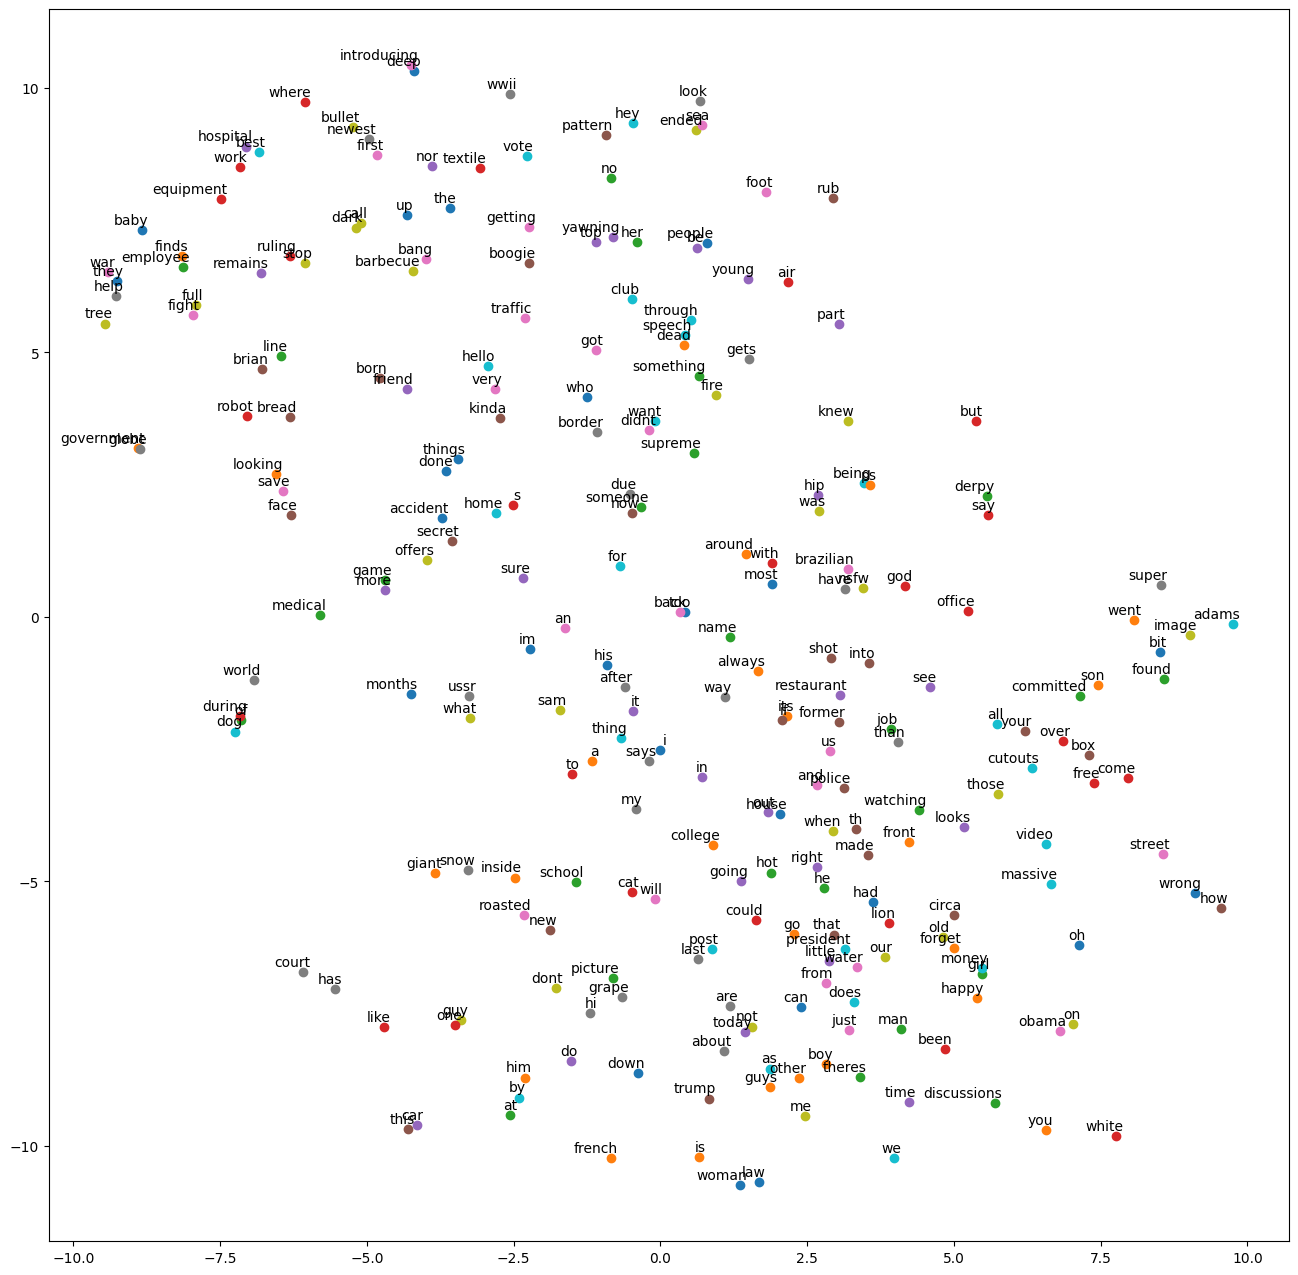

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# TSNE converts high dimesnional vectors to 2D/3D vectors for visualization
def tsne():

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(word_vector_matrix[:250])
    print(new_values.shape)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16,16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne()

In [ ]:
#model.add(Embedding(vocab_size, vec_size, input_length=max_length, weights = [word_vector_matrix], trainable = False))


# 4.  Building of Functional API Model

In [ ]:
# Apply CNN for Images
# Apply Glove Embeddings for text

# Loading images and preprocessing for training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install Pillow requests

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
print(tf.__version__)

2.14.0


In [ ]:
# path for train images

#train_images_url = "/content/drive/MyDrive/Colab Notebooks/Images/train"

train_images_url = "/content/drive/MyDrive/Colab Notebooks/CSC219-MachineLearning/project4/multimodal_only_samples/images"

In [ ]:
import pathlib
# archive = tf.keras.utils.get_file(origin=train_images_url, extract=True)
data_dir = pathlib.Path(train_images_url)

In [ ]:
data_dir

PosixPath('/content/drive/MyDrive/Colab Notebooks/CSC219-MachineLearning/project4/multimodal_only_samples/images')

In [ ]:
image_count = len(list(data_dir.glob('*.jpg')))
print(image_count)

320


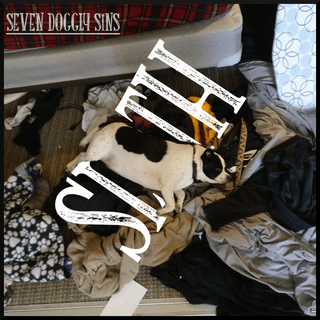

In [ ]:
img = list(data_dir.glob('*'))
PIL.Image.open(str(img[13]))

In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img

# Directory path containing the images
directory_path = data_dir

loaded_images = []

# List of image file names (assuming all images are in the same directory)
image_filenames = os.listdir(directory_path)

# Loop through the image file names and match it with id in dataset and load each image
for filename in image_filenames:
    if filename.endswith(('.jpg', '.png', '.jpeg')):  # Filter by supported image file extensions
      for i in range(len(x_train)):
        image_name = filename.split('.')[0]
        if image_name == x_train['id'][i]:
          print('Title is: ', x_train['clean_title'][i], ' Image id is: ', x_train['id'][i], ' Image file is: ', filename)
          img = load_img(os.path.join(directory_path, filename), color_mode="rgb", target_size=(200,200))
          input_arr = tf.keras.utils.img_to_array(img)
          loaded_images.append(input_arr)

input_arr = np.array(loaded_images)

images = input_arr / 255.0  # Normalize the image pixel values


# Check the minimum and maximum values of the normalized images
min_value = np.min(images)
max_value = np.max(images)

if 0.0 <= min_value <= 1.0 and 0.0 <= max_value <= 1.0:
    print("Normalization was successful.")
else:
    print("Normalization may not have worked as expected.")

first_image = images[1]

pixel_value = first_image[100, 150]
print("Pixel value at (100, 150):", pixel_value)



Title is:  from to us  Image id is:  6f2cy5  Image file is:  6f2cy5.jpg
Title is:  my mucinex was with the mucinex but in a order  Image id is:  awxhir  Image file is:  awxhir.jpg
Title is:  english by up its own  Image id is:  4zd1tb  Image file is:  4zd1tb.jpg
Title is:  cutouts  Image id is:  cgp0lmq  Image file is:  cgp0lmq.jpg
Title is:  the great crusade france  Image id is:  bmg5cj  Image file is:  bmg5cj.jpg
Title is:  i flying over no moon  Image id is:  cocpysr  Image file is:  cocpysr.jpg
Title is:  taking in the view  Image id is:  4xypkv  Image file is:  4xypkv.jpg
Title is:  major  Image id is:  6d50rl  Image file is:  6d50rl.jpg
Title is:  jesus christ to and circa  Image id is:  98vrcq  Image file is:  98vrcq.jpg
Title is:  and after at wedding  Image id is:  2vkbtj  Image file is:  2vkbtj.jpg
Title is:  from pig could be for to with milk  Image id is:  86byl8  Image file is:  86byl8.jpg
Title is:  girl wearing a cat  Image id is:  2cfi7g  Image file is:  2cfi7g.jpg
Tit

In [ ]:
images

array([[[[0.75686276, 0.75686276, 0.75686276],
         [0.75686276, 0.75686276, 0.75686276],
         [0.75686276, 0.75686276, 0.75686276],
         ...,
         [0.21176471, 0.17254902, 0.13333334],
         [0.21176471, 0.17254902, 0.13333334],
         [0.21176471, 0.17254902, 0.13333334]],

        [[0.7607843 , 0.7607843 , 0.7607843 ],
         [0.7607843 , 0.7607843 , 0.7607843 ],
         [0.7607843 , 0.7607843 , 0.7607843 ],
         ...,
         [0.19215687, 0.14117648, 0.10588235],
         [0.18431373, 0.14509805, 0.09803922],
         [0.18431373, 0.14509805, 0.09803922]],

        [[0.7607843 , 0.7607843 , 0.7607843 ],
         [0.7607843 , 0.7607843 , 0.7607843 ],
         [0.7607843 , 0.7607843 , 0.7607843 ],
         ...,
         [0.19215687, 0.13725491, 0.09411765],
         [0.1882353 , 0.14117648, 0.08627451],
         [0.1882353 , 0.14117648, 0.08627451]],

        ...,

        [[0.01176471, 0.00784314, 0.        ],
         [0.01176471, 0.00784314, 0.        ]

In [ ]:
images.shape

(320, 200, 200, 3)

In [ ]:
# path for train images

#train_images_url = "/content/drive/MyDrive/Colab Notebooks/Images/train"
#train_images_url = "/content/drive/MyDrive/Colab Notebooks/CSC219-MachineLearning/project4/multimodal_only_samples/images"

test_images_url = "/content/drive/MyDrive/Colab Notebooks/CSC219-MachineLearning/project4/multimodal_only_samples/images_test"

In [ ]:
data_dir_test = pathlib.Path(test_images_url)

In [ ]:
data_dir_test

PosixPath('/content/drive/MyDrive/Colab Notebooks/CSC219-MachineLearning/project4/multimodal_only_samples/images_test')

In [ ]:
image_count_test = len(list(data_dir_test.glob('*.jpg')))
print(image_count_test)

431


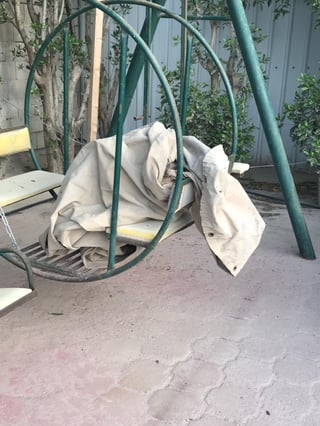

In [ ]:
img_test = list(data_dir_test.glob('*'))
PIL.Image.open(str(img_test[42]))

In [ ]:
# Directory path containing the test images
directory_path_test = data_dir_test

loaded_images_test = []

# List of image file names (assuming all images are in the same directory)
image_filenames_test = os.listdir(directory_path_test)  # Use directory_path_test

# Create a dictionary to map image names to their corresponding index in x_test
image_name_to_index = {x_test['id'][i]: i for i in range(len(x_test))}

# Loop through the image file names and load each image
for filename in image_filenames_test:
    if filename.endswith(('.jpg', '.png', '.jpeg')):  # Filter by supported image file extensions
        image_name_test = filename.split('.')[0]
        if image_name_test in image_name_to_index:
            i = image_name_to_index[image_name_test]
            print('Title is:', x_test['clean_title'][i], 'Image id is:', x_test['id'][i], 'Image file is:', filename)
            img_test = load_img(os.path.join(directory_path_test, filename), color_mode="rgb", target_size=(200, 200))
            input_arr_test = tf.keras.utils.img_to_array(img_test)
            loaded_images_test.append(input_arr_test)
        else:
            print(f"No corresponding entry in x_test for image file: {filename}")
    else:
        print(f"Skipping non-image file: {filename}")

input_arr_test = np.array(loaded_images_test)

images_test = input_arr_test / 255.0  # Normalize the image pixel values

# Check the minimum and maximum values of the normalized images
min_value_test = np.min(images_test)
max_value_test = np.max(images_test)

if 0.0 <= min_value_test <= 1.0 and 0.0 <= max_value_test <= 1.0:
    print("Normalization was successful.")
else:
    print("Normalization may not have worked as expected.")

first_image_test = images_test[0]  # Index 1 was used in your original code, but Python uses 0-based indexing

pixel_value = first_image_test[100, 150]
print("Pixel value at (100, 150):", pixel_value)


Title is: your little one Image id is: cjqctpw Image file is: cjqctpw.jpg
Title is: say hello to my little friend Image id is: d2ezoob Image file is: d2ezoob.jpg
Title is: new image from the Image id is: d0bzlq Image file is: d0bzlq.jpg
Title is: my says hi Image id is: cypw96 Image file is: cypw96.jpg
Title is: is it time for Image id is: ccewep5 Image file is: ccewep5.jpg
Title is: this back rub foot rub in my was down due to always knew something was up Image id is: b7d2im Image file is: b7d2im.jpg
Title is: just bit into a grape that ended up being a grape inside a grape Image id is: cl7zfa Image file is: cl7zfa.jpg
Title is: this cat out of a box Image id is: en2chek Image file is: en2chek.jpg
Title is: the if i got a through my too Image id is: 8rsoq0 Image file is: 8rsoq0.jpg
Title is: something lion yawning Image id is: 151xr9 Image file is: 151xr9.jpg
Title is: this tree i found with a on it Image id is: bq3yuk Image file is: bq3yuk.jpg
Title is: tree Image id is: 33sekv Image

In [ ]:
images_test.shape

(431, 200, 200, 3)

In [ ]:
print(X.shape)
print(Y.shape)

(320, 120)
(320,)


In [ ]:
print(X_test.shape)
print(Y_test.shape)

(431, 120)
(431,)


In [ ]:
# image datasets
print(images.shape)
print(images_test.shape)

(320, 200, 200, 3)
(431, 200, 200, 3)


# BASIC MODEL

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 200, 200, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 100, 100, 64)         0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 input_2 (InputLayer)        [(None, 120)]                0         []                        

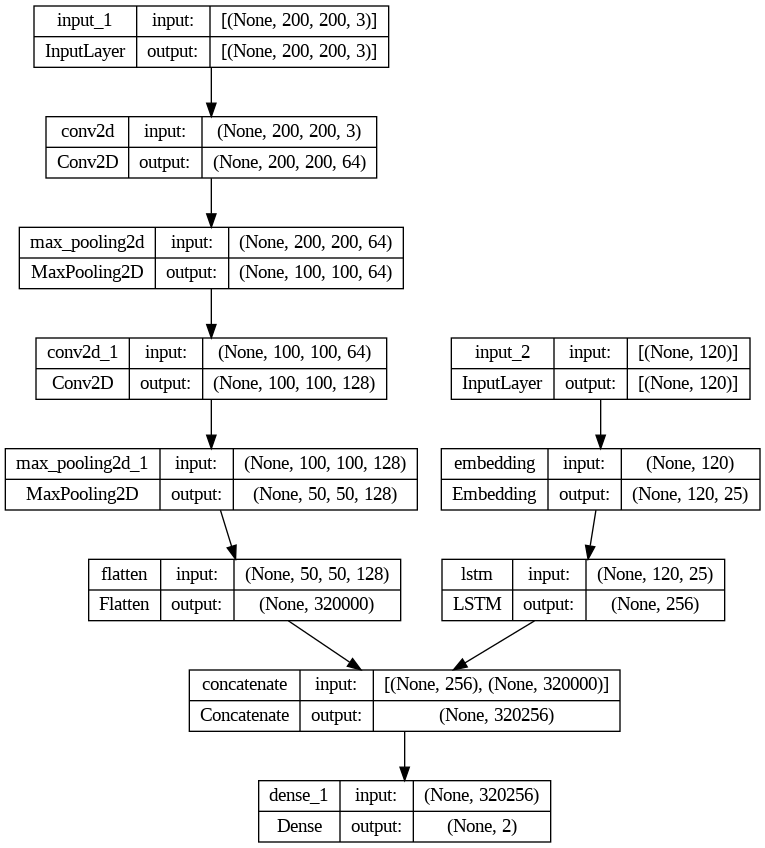

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Input, LSTM, Embedding, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# Define the vision model
vec_size = 25
image_input = Input(shape=(200, 200, 3))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(image_input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)

# Define the language model
vocab_size = 398
max_length = 120
question_input = Input(shape=(max_length,), dtype='int32')
embedded_question = Embedding(input_dim=vocab_size, output_dim=vec_size, input_length=max_length, weights=[word_vector_matrix], trainable=False)(question_input)
encoded_question = LSTM(256)(embedded_question)

# Concatenate vision and language models
merged = concatenate([encoded_question, x])

# interpretation layer
hidden1 = Dense(10, activation='relu')(merged)

# Logistic regression on top
output = Dense(2, activation='softmax')(merged)

# Create the final model
vqa_model = Model(inputs=[image_input, question_input], outputs=output)

# Summarize layers
print(vqa_model.summary())

# Plot graph
plot_model(vqa_model, to_file='./visual_question_answering.png', show_shapes=True)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

# Initialize variables to store the best model's performance
best_val_loss = float('inf')
best_model_weights = None

# Define the number of training runs
num_runs = 5

for run in range(num_runs):
    print(f"Training run {run+1}/{num_runs}")

    # Compile the model
    vqa_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Set up Early Stopping with restoring the best weights
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

    # Specify a file name for saving the best model weights
    checkpointer = ModelCheckpoint(filepath=f"best_vqa_model_run_{run+1}.h5", verbose=0, save_best_only=True)

    # Train the model
    vqa_model.fit([images, X], yseq_train,
                  validation_data=([images_test, X_test], yseq_test),
                  callbacks=[monitor, checkpointer],
                  verbose=2,
                  epochs=100)

    # After each run, check if it produced a better model
    val_loss = monitor.best
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_weights = f"best_vqa_model_run_{run+1}.h5"

# Load the best model weights based on validation performance
if best_model_weights:
    vqa_model.load_weights(best_model_weights)
    print("Best model loaded.")
else:
    print("No best model found.")


Training run 1/5
Epoch 1/100
10/10 - 15s - loss: 2.2681 - accuracy: 0.4781 - val_loss: 0.6841 - val_accuracy: 0.6056 - 15s/epoch - 2s/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 - 1s - loss: 0.6841 - accuracy: 0.5969 - val_loss: 0.6807 - val_accuracy: 0.6056 - 979ms/epoch - 98ms/step
Epoch 3/100
10/10 - 1s - loss: 0.6556 - accuracy: 0.6031 - val_loss: 0.7311 - val_accuracy: 0.6056 - 931ms/epoch - 93ms/step
Epoch 4/100
10/10 - 1s - loss: 0.6219 - accuracy: 0.6656 - val_loss: 0.7006 - val_accuracy: 0.5916 - 926ms/epoch - 93ms/step
Epoch 5/100
10/10 - 1s - loss: 0.5715 - accuracy: 0.7188 - val_loss: 0.7308 - val_accuracy: 0.5893 - 928ms/epoch - 93ms/step
Epoch 6/100
10/10 - 1s - loss: 0.4981 - accuracy: 0.7844 - val_loss: 0.7598 - val_accuracy: 0.5151 - 918ms/epoch - 92ms/step
Epoch 7/100
Restoring model weights from the end of the best epoch: 2.
10/10 - 1s - loss: 0.3917 - accuracy: 0.8500 - val_loss: 0.7919 - val_accuracy: 0.5313 - 940ms/epoch - 94ms/step
Epoch 7: early stopping
Training run 2/5
Epoch 1/100
10/10 - 4s - loss: 0.6776 - accuracy: 0.5875 - val_loss: 0.6849 - val_accuracy: 0.6009 - 4s/epoch - 404ms/step
Epoch 2/100
10/10 - 1s - loss: 0.6314 -

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Generate predictions using the VQA model
pred = vqa_model.predict([images_test, X_test])

# Get the class with the highest probability as the predicted class
y_pred = np.argmax(pred, axis=1)

y_true = np.argmax(yseq_test, axis=1)

# Print the classification report
print("Classification report for cnn model")
print(classification_report(y_true, y_pred))


14/14 [==============================] - 1s 21ms/step
Classification report for cnn model
              precision    recall  f1-score   support

           0       0.61      0.98      0.75       263
           1       0.40      0.02      0.04       168

    accuracy                           0.61       431
   macro avg       0.51      0.50      0.40       431
weighted avg       0.53      0.61      0.48       431



# SELF-ATTENTION

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 200, 200, 64)         1792      ['input_3[0][0]']             
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 100, 100, 64)         0         ['conv2d_2[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 100, 100, 128)        73856     ['max_pooling2d_2[0][0]'

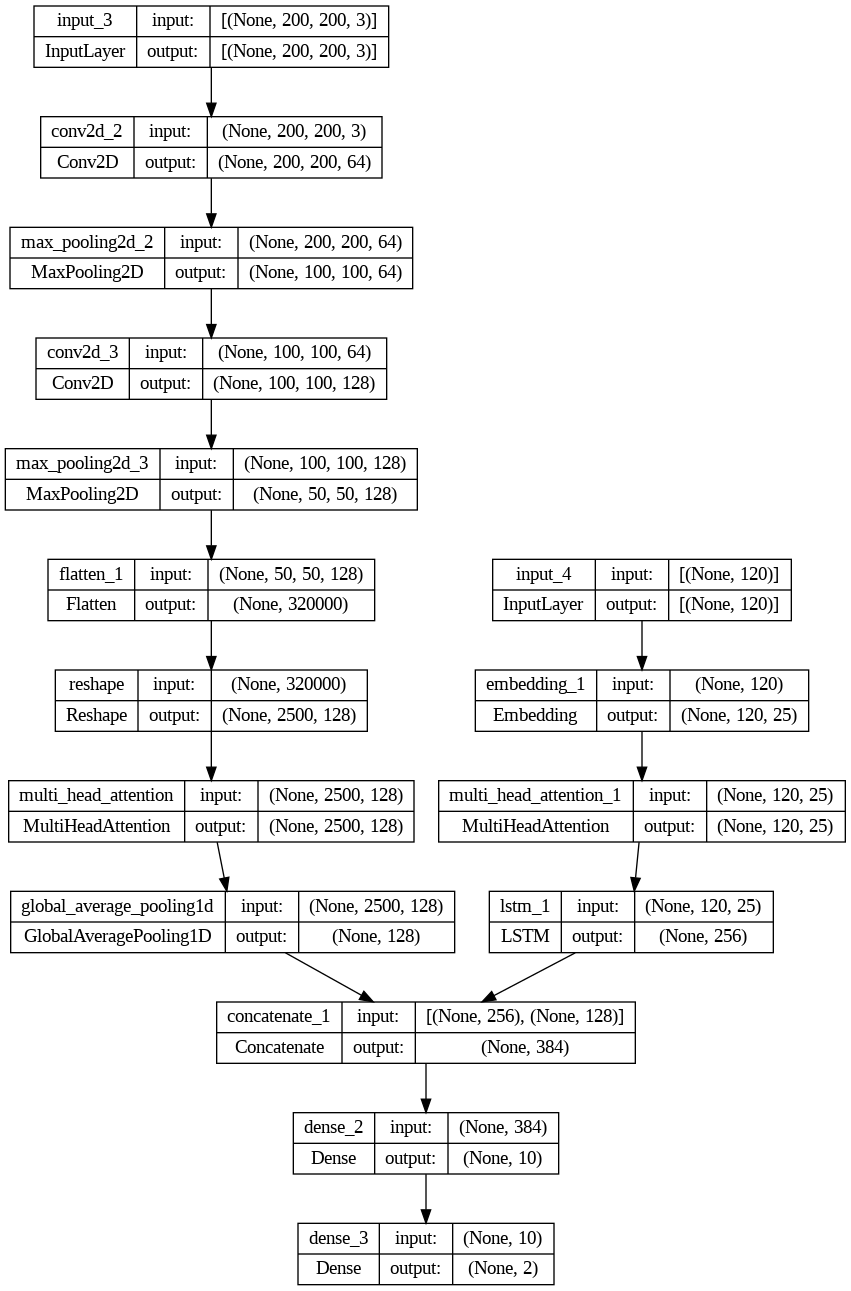

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Input, LSTM, Embedding,
                                     Dense, concatenate, Reshape, MultiHeadAttention, GlobalAveragePooling1D)
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# Define the vision model with self-attention
image_input = Input(shape=(200, 200, 3))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(image_input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Reshape((-1, 128))(x)  # Reshape for self-attention
vision_attention = MultiHeadAttention(num_heads=2, key_dim=128)(x, x)
vision_output = GlobalAveragePooling1D()(vision_attention)  # Pooling to get a single vector

# Define the language model with self-attention
vocab_size = 398
max_length = 120
vec_size = 25
question_input = Input(shape=(max_length,), dtype='int32')
embedded_question = Embedding(input_dim=vocab_size, output_dim=vec_size, input_length=max_length, weights=[word_vector_matrix], trainable=False)(question_input)
question_attention = MultiHeadAttention(num_heads=2, key_dim=vec_size)(embedded_question, embedded_question)
encoded_question = LSTM(256)(question_attention)

# Concatenate vision and language models
merged = concatenate([encoded_question, vision_output])

# Interpretation layer
hidden1 = Dense(10, activation='relu')(merged)

# Logistic regression on top
output = Dense(2, activation='softmax')(hidden1)

# Create the final model
vqa_model = Model(inputs=[image_input, question_input], outputs=output)

# Summarize layers
print(vqa_model.summary())

# Plot graph
plot_model(vqa_model, to_file='visual_question_answering_with_attention.png', show_shapes=True)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

# Initialize variables to store the best model's performance
best_val_loss = float('inf')
best_model_weights = None

# Define the number of training runs
num_runs = 5

for run in range(num_runs):
    print(f"Training run {run+1}/{num_runs}")

    # Compile the model
    vqa_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Set up Early Stopping with restoring the best weights
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

    # Specify a file name for saving the best model weights
    checkpointer = ModelCheckpoint(filepath=f"best_vqa_model_run_{run+1}.h5", verbose=0, save_best_only=True)

    # Train the model
    vqa_model.fit([images, X], yseq_train,
                  validation_data=([images_test, X_test], yseq_test),
                  callbacks=[monitor, checkpointer],
                  verbose=2,
                  epochs=100)

    # After each run, check if it produced a better model
    val_loss = monitor.best
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_weights = f"best_vqa_model_run_{run+1}.h5"

# Load the best model weights based on validation performance
if best_model_weights:
    vqa_model.load_weights(best_model_weights)
    print("Best model loaded.")
else:
    print("No best model found.")


Training run 1/5
Epoch 1/100
10/10 - 11s - loss: 0.6220 - accuracy: 0.5969 - val_loss: 0.6305 - val_accuracy: 0.6125 - 11s/epoch - 1s/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 - 6s - loss: 0.5959 - accuracy: 0.6375 - val_loss: 0.6306 - val_accuracy: 0.6009 - 6s/epoch - 622ms/step
Epoch 3/100
10/10 - 6s - loss: 0.5997 - accuracy: 0.6687 - val_loss: 0.6323 - val_accuracy: 0.5986 - 6s/epoch - 634ms/step
Epoch 4/100
10/10 - 7s - loss: 0.5849 - accuracy: 0.6812 - val_loss: 0.6716 - val_accuracy: 0.5893 - 7s/epoch - 651ms/step
Epoch 5/100
10/10 - 7s - loss: 0.5865 - accuracy: 0.6750 - val_loss: 0.6396 - val_accuracy: 0.5963 - 7s/epoch - 658ms/step
Epoch 6/100
Restoring model weights from the end of the best epoch: 1.
10/10 - 6s - loss: 0.5887 - accuracy: 0.6625 - val_loss: 0.6409 - val_accuracy: 0.6079 - 6s/epoch - 649ms/step
Epoch 6: early stopping
Training run 2/5
Epoch 1/100
10/10 - 11s - loss: 0.6020 - accuracy: 0.6406 - val_loss: 0.6311 - val_accuracy: 0.6009 - 11s/epoch - 1s/step
Epoch 2/100
10/10 - 6s - loss: 0.5931 - accuracy: 0.6594 - val_loss: 0.6459 - val_accuracy: 0.6032 - 6s/epoch - 610ms/step
Epoch 3/100
10/10 - 6s - loss: 0.5886 - accuracy: 0.

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Generate predictions using the VQA model
pred = vqa_model.predict([images_test, X_test])

# Get the class with the highest probability as the predicted class
y_pred = np.argmax(pred, axis=1)

y_true = np.argmax(yseq_test, axis=1)

# Print the classification report
print("Classification report for self attention model")
print(classification_report(y_true, y_pred))


14/14 [==============================] - 2s 136ms/step
Classification report for self attention model
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       263
           1       0.50      0.44      0.47       168

    accuracy                           0.61       431
   macro avg       0.59      0.58      0.58       431
weighted avg       0.60      0.61      0.61       431



# CROSS-ATTENTION

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 200, 200, 64)         1792      ['input_5[0][0]']             
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 100, 100, 64)         0         ['conv2d_4[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_5 (Conv2D)           (None, 100, 100, 128)        73856     ['max_pooling2d_4[0][0]'

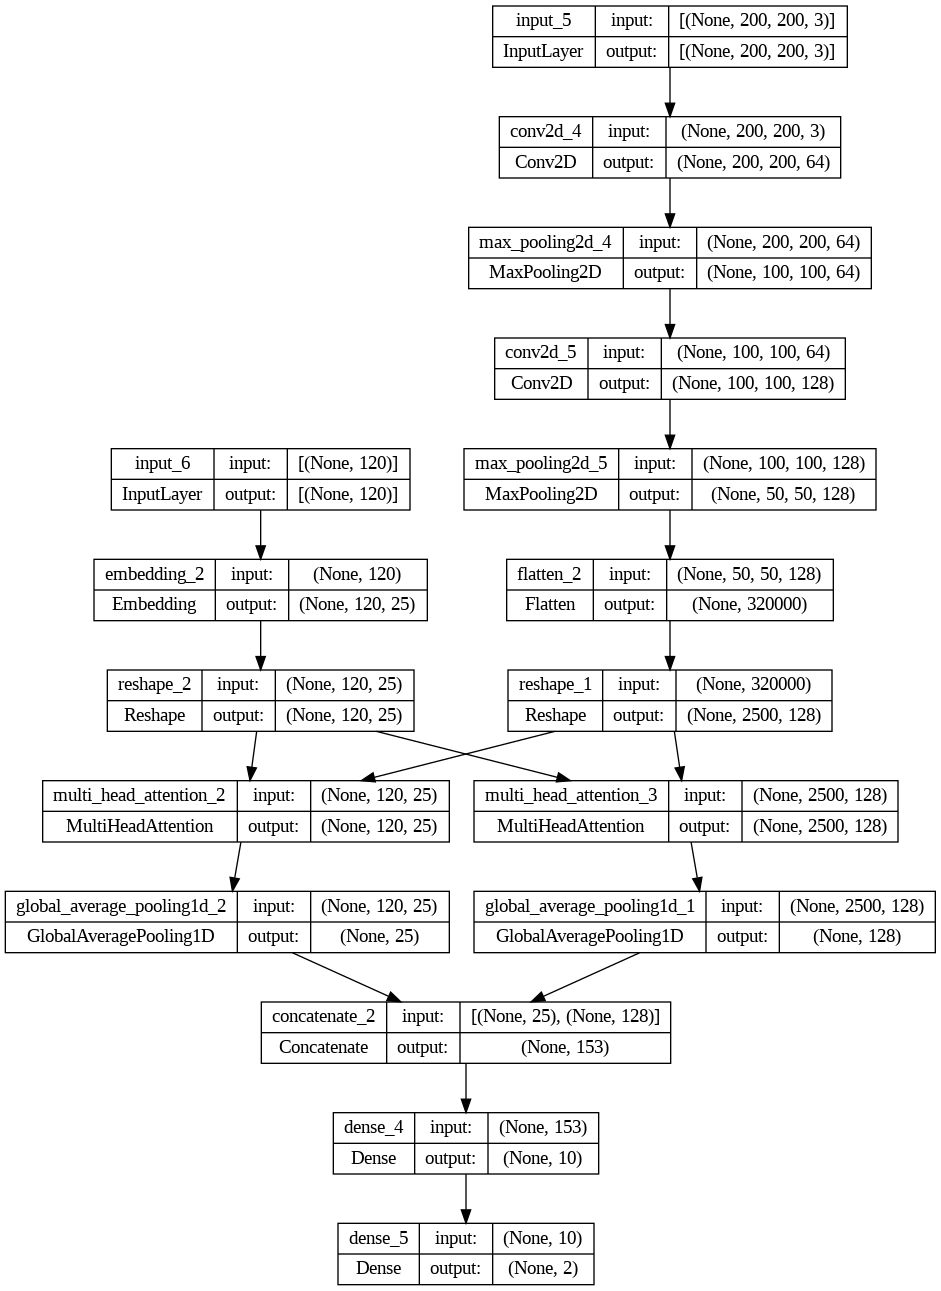

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Input, LSTM, Embedding,
                                     Dense, concatenate, Reshape, MultiHeadAttention, GlobalAveragePooling1D)
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# Define the vision model
image_input = Input(shape=(200, 200, 3))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(image_input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Reshape((-1, 128))(x)  # Reshape for attention

# Define the language model
vocab_size = 398
max_length = 120
vec_size = 25
question_input = Input(shape=(max_length,), dtype='int32')
embedded_question = Embedding(input_dim=vocab_size, output_dim=vec_size, input_length=max_length, weights=[word_vector_matrix], trainable=False)(question_input)
embedded_question = Reshape((-1, vec_size))(embedded_question)  # Reshape for attention

# Cross-attention layers
# Vision-to-Language Attention
vision_to_language_attention = MultiHeadAttention(num_heads=2, key_dim=vec_size)(embedded_question, x)
# Language-to-Vision Attention
language_to_vision_attention = MultiHeadAttention(num_heads=2, key_dim=128)(x, embedded_question)

# Pooling to get single vectors
vision_output = GlobalAveragePooling1D()(language_to_vision_attention)
language_output = GlobalAveragePooling1D()(vision_to_language_attention)

# Concatenate vision and language models outputs
merged = concatenate([language_output, vision_output])

# Interpretation layer
hidden1 = Dense(10, activation='relu')(merged)

# Logistic regression on top
output = Dense(2, activation='softmax')(hidden1)

# Create the final model
vqa_model = Model(inputs=[image_input, question_input], outputs=output)

# Summarize layers
print(vqa_model.summary())

# Plot graph
plot_model(vqa_model, to_file='visual_question_answering_with_cross_attention.png', show_shapes=True)



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

# Initialize variables to store the best model's performance
best_val_loss = float('inf')
best_model_weights = None

# Define the number of training runs
num_runs = 5

for run in range(num_runs):
    print(f"Training run {run+1}/{num_runs}")

    # Compile the model
    vqa_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Set up Early Stopping with restoring the best weights
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

    # Specify a file name for saving the best model weights
    checkpointer = ModelCheckpoint(filepath=f"best_vqa_cross_attention_model_run_{run+1}.h5", verbose=0, save_best_only=True)

    # Train the model
    vqa_model.fit([images, X], yseq_train,
                  validation_data=([images_test, X_test], yseq_test),
                  callbacks=[monitor, checkpointer],
                  verbose=2,
                  epochs=100)

    # After each run, check if it produced a better model
    val_loss = monitor.best
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_weights = f"best_vqa_cross_attention_model_run_{run+1}.h5"

# Load the best model weights based on validation performance
if best_model_weights:
    vqa_model.load_weights(best_model_weights)
    print("Best model loaded.")
else:
    print("No best model found.")


Training run 1/5
Epoch 1/100
10/10 - 5s - loss: 0.5915 - accuracy: 0.6562 - val_loss: 0.6834 - val_accuracy: 0.5963 - 5s/epoch - 537ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 - 2s - loss: 0.5784 - accuracy: 0.6750 - val_loss: 0.6663 - val_accuracy: 0.6079 - 2s/epoch - 163ms/step
Epoch 3/100
10/10 - 2s - loss: 0.5700 - accuracy: 0.6844 - val_loss: 0.7050 - val_accuracy: 0.5800 - 2s/epoch - 157ms/step
Epoch 4/100
10/10 - 2s - loss: 0.5612 - accuracy: 0.6781 - val_loss: 0.6720 - val_accuracy: 0.5940 - 2s/epoch - 156ms/step
Epoch 5/100
10/10 - 2s - loss: 0.5519 - accuracy: 0.6906 - val_loss: 0.6922 - val_accuracy: 0.5940 - 2s/epoch - 157ms/step
Epoch 6/100
10/10 - 2s - loss: 0.5554 - accuracy: 0.6812 - val_loss: 0.7039 - val_accuracy: 0.6079 - 2s/epoch - 156ms/step
Epoch 7/100
Restoring model weights from the end of the best epoch: 2.
10/10 - 2s - loss: 0.5438 - accuracy: 0.7063 - val_loss: 0.6833 - val_accuracy: 0.6056 - 2s/epoch - 160ms/step
Epoch 7: early stopping
Training run 2/5
Epoch 1/100
10/10 - 5s - loss: 0.5951 - accuracy: 0.6656 - val_loss: 0.6779 - val_accuracy: 0.5986 - 5s/epoch - 541ms/step
Epoch 2/100
10/10 - 2s - loss: 0.5779 - accuracy: 0

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Generate predictions using the VQA cross-attention model
# Replace 'images_test' and 'X_test' with the actual variables of your test dataset
pred = vqa_model.predict([images_test, X_test])

# Get the class with the highest probability as the predicted class
y_pred = np.argmax(pred, axis=1)

# Assuming 'yseq_test' is the true labels for your test dataset in one-hot encoded format
y_true = np.argmax(yseq_test, axis=1)

# Print the classification report
print("Classification report for cross attention model")
print(classification_report(y_true, y_pred))


14/14 [==============================] - 1s 38ms/step
Classification report for cross attention model
              precision    recall  f1-score   support

           0       0.64      0.81      0.72       263
           1       0.49      0.29      0.36       168

    accuracy                           0.61       431
   macro avg       0.57      0.55      0.54       431
weighted avg       0.58      0.61      0.58       431



# CO-ATTENTION

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 200, 200, 64)         1792      ['input_11[0][0]']            
                                                                                                  
 max_pooling2d_10 (MaxPooli  (None, 100, 100, 64)         0         ['conv2d_10[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 100, 100, 128)        73856     ['max_pooling2d_10[0][0]

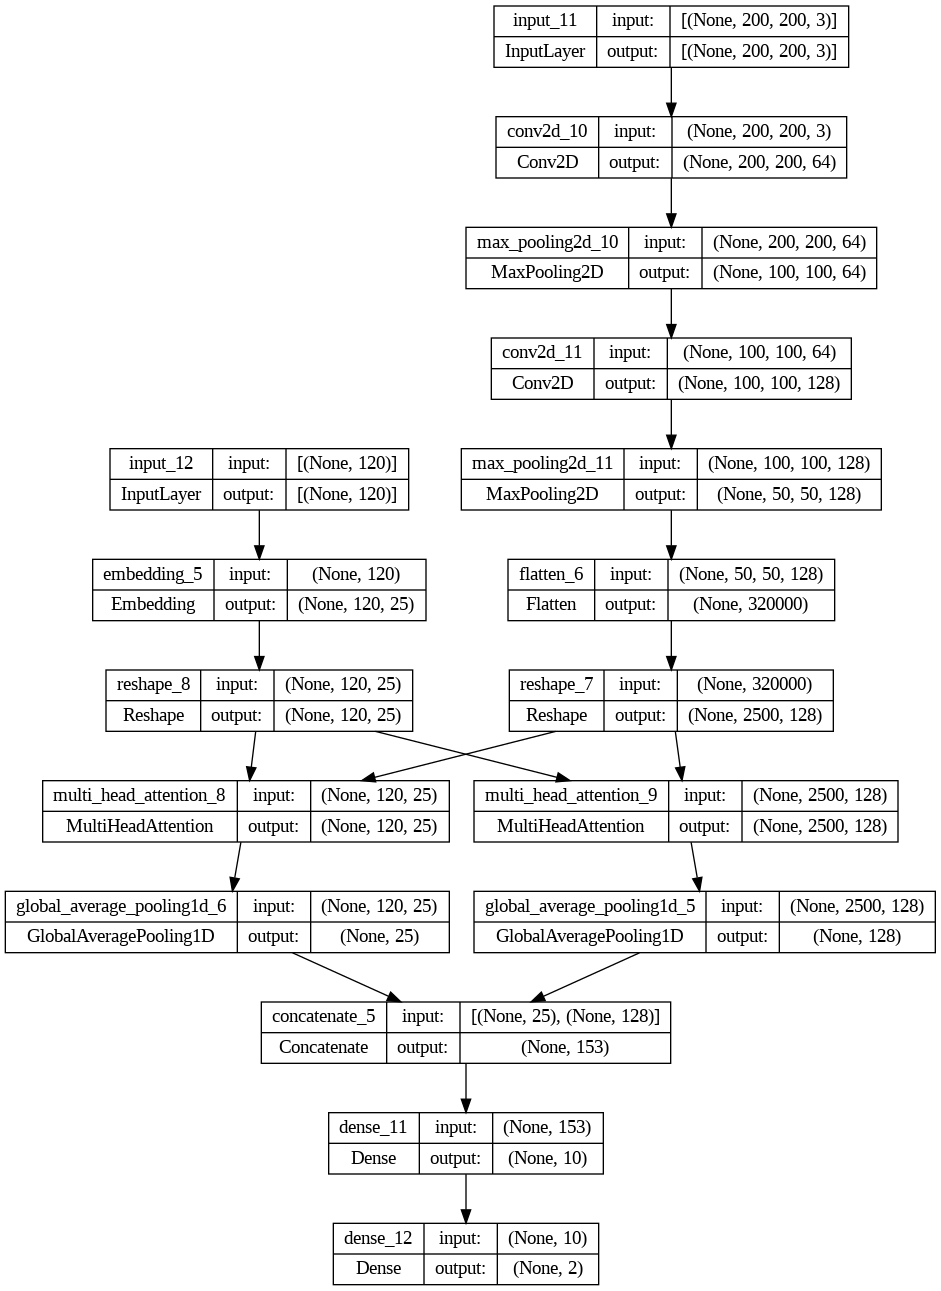

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Input, LSTM, Embedding,
                                     Dense, concatenate, Reshape, MultiHeadAttention, GlobalAveragePooling1D)
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# Define the vision model
image_input = Input(shape=(200, 200, 3))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(image_input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Reshape((-1, 128))(x)  # Reshape for co-attention

# Define the language model
vocab_size = 398
max_length = 120
vec_size = 25
question_input = Input(shape=(max_length,), dtype='int32')
embedded_question = Embedding(input_dim=vocab_size, output_dim=vec_size, input_length=max_length, weights=[word_vector_matrix], trainable=False)(question_input)
embedded_question = Reshape((-1, vec_size))(embedded_question)  # Reshape for co-attention

# Co-attention layers
# Vision-to-Language Co-Attention
vision_to_language_attention = MultiHeadAttention(num_heads=2, key_dim=vec_size)(embedded_question, x)
# Language-to-Vision Co-Attention
language_to_vision_attention = MultiHeadAttention(num_heads=2, key_dim=128)(x, embedded_question)

# Pooling to get single vectors
vision_output = GlobalAveragePooling1D()(language_to_vision_attention)
language_output = GlobalAveragePooling1D()(vision_to_language_attention)

# Concatenate vision and language models outputs
merged = concatenate([language_output, vision_output])

# Interpretation layer
hidden1 = Dense(10, activation='relu')(merged)

# Logistic regression on top
output = Dense(2, activation='softmax')(hidden1)

# Create the final model
vqa_model = Model(inputs=[image_input, question_input], outputs=output)

# Summarize layers
print(vqa_model.summary())

# Plot graph
plot_model(vqa_model, to_file='visual_question_answering_with_co_attention.png', show_shapes=True)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

# Initialize variables to store the best model's performance
best_val_loss = float('inf')
best_model_weights = None

# Define the number of training runs
num_runs = 5

for run in range(num_runs):
    print(f"Training run {run+1}/{num_runs}")

    # Compile the model
    vqa_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Set up Early Stopping with restoring the best weights
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

    # Specify a file name for saving the best model weights
    checkpointer = ModelCheckpoint(filepath=f"best_vqa_model_run_{run+1}.h5", verbose=0, save_best_only=True)

    # Train the model
    # Note: Replace 'images', 'X', 'yseq_train', 'images_test', 'X_test', 'yseq_test' with your actual data variables
    vqa_model.fit([images, X], yseq_train,
                  validation_data=([images_test, X_test], yseq_test),
                  callbacks=[monitor, checkpointer],
                  verbose=2,
                  epochs=100)

    # After each run, check if it produced a better model
    val_loss = monitor.best
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_weights = f"best_vqa_model_run_{run+1}.h5"

# Load the best model weights based on validation performance
if best_model_weights:
    vqa_model.load_weights(best_model_weights)
    print("Best model loaded.")
else:
    print("No best model found.")


Training run 1/5
Epoch 1/100
10/10 - 5s - loss: 0.6035 - accuracy: 0.5938 - val_loss: 0.6515 - val_accuracy: 0.6102 - 5s/epoch - 533ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 - 2s - loss: 0.5936 - accuracy: 0.5938 - val_loss: 0.6536 - val_accuracy: 0.6102 - 2s/epoch - 157ms/step
Epoch 3/100
10/10 - 2s - loss: 0.5859 - accuracy: 0.5938 - val_loss: 0.6540 - val_accuracy: 0.6102 - 2s/epoch - 156ms/step
Epoch 4/100
10/10 - 2s - loss: 0.5820 - accuracy: 0.5938 - val_loss: 0.6563 - val_accuracy: 0.6102 - 2s/epoch - 156ms/step
Epoch 5/100
10/10 - 2s - loss: 0.5758 - accuracy: 0.6625 - val_loss: 0.6444 - val_accuracy: 0.5777 - 2s/epoch - 164ms/step
Epoch 6/100
10/10 - 2s - loss: 0.5811 - accuracy: 0.6906 - val_loss: 0.6623 - val_accuracy: 0.5824 - 2s/epoch - 157ms/step
Epoch 7/100
10/10 - 2s - loss: 0.5734 - accuracy: 0.6906 - val_loss: 0.6498 - val_accuracy: 0.5708 - 2s/epoch - 160ms/step
Epoch 8/100
10/10 - 2s - loss: 0.5852 - accuracy: 0.6844 - val_loss: 0.6603 - val_accuracy: 0.5754 - 2s/epoch - 158ms/step
Epoch 9/100
10/10 - 2s - loss: 0.5787 - accuracy: 0.6906 - val_loss: 0.6523 - val_accuracy: 0.5731 - 2s/epoch - 159ms/step
Epoch 10/100
Restoring model

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Generate predictions using the VQA model
pred = vqa_model.predict([images_test, X_test])

# Get the class with the highest probability as the predicted class
y_pred = np.argmax(pred, axis=1)

y_true = np.argmax(yseq_test, axis=1)

# Print the classification report
print("Classification report for co attention model")
print(classification_report(y_true, y_pred))


14/14 [==============================] - 1s 38ms/step
Classification report for co attention model
              precision    recall  f1-score   support

           0       0.72      0.51      0.60       263
           1       0.47      0.69      0.56       168

    accuracy                           0.58       431
   macro avg       0.60      0.60      0.58       431
weighted avg       0.62      0.58      0.58       431



# RESNET

94765736/94765736 [==============================] - 5s 0us/step
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 206, 206, 3)          0         ['input_11[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 100, 100, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 100, 100, 64)         256       ['conv1_conv[0][0]']          
 on)                       

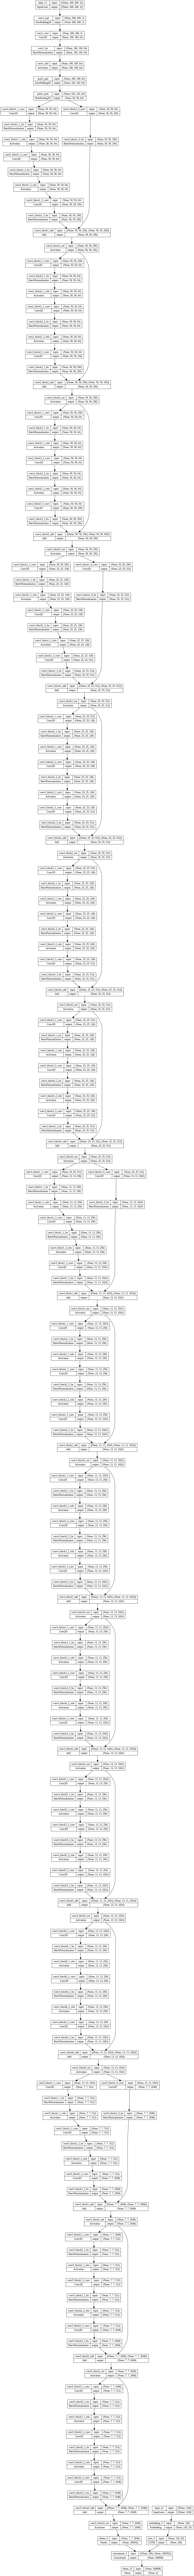

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import plot_model

# Define the vision model using ResNet50 as the base
vec_size = 25
image_input = Input(shape=(200, 200, 3))
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=image_input)

# Add your own classification layers on top of ResNet50
x = Flatten()(base_model.output)

# Define the language model
vocab_size = 398
max_length = 120
question_input = Input(shape=(max_length,), dtype='int32')
embedded_question = Embedding(input_dim=vocab_size, output_dim=vec_size, input_length=max_length)(question_input)
encoded_question = LSTM(256)(embedded_question)

# Concatenate vision and language models
merged = concatenate([encoded_question, x])

# Logistic regression on top
output = Dense(2, activation='softmax')(merged)

# Create the final VQA model with a new name, 'resnet_model'
resnet_model = Model(inputs=[image_input, question_input], outputs=output)

# Optionally, you can freeze ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()

# Plot graph
plot_model(resnet_model, to_file='./visual_question_answering_with_resnet.png', show_shapes=True)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

# Initialize variables to store the best model's performance
best_val_loss = float('inf')
best_model_weights = None

# Define the number of training runs
num_runs = 1

for run in range(num_runs):
    print(f"Training run {run+1}/{num_runs}")

    # Compile the model
    resnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Set up Early Stopping with restoring the best weights
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

    # Specify a file name for saving the best model weights
    checkpointer = ModelCheckpoint(filepath=f"best_resnet_model_run_{run+1}.h5", verbose=0, save_best_only=True)

    # Train the model
    # Note: Replace 'images', 'X', 'yseq_train', 'images_test', 'X_test', 'yseq_test' with your actual data variables
    resnet_model.fit([images, X], yseq_train,
                  validation_data=([images_test, X_test], yseq_test),
                  callbacks=[monitor, checkpointer],
                  verbose=2,
                  epochs=100)

    # After each run, check if it produced a better model
    val_loss = monitor.best
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_weights = f"best_resnet_model_run_{run+1}.h5"

# Load the best model weights based on validation performance
if best_model_weights:
    resnet_model.load_weights(best_model_weights)
    print("Best model loaded.")
else:
    print("No best model found.")


Training run 1/1
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 - 11s - loss: 7.0741 - accuracy: 0.5000 - val_loss: 4.5875 - val_accuracy: 0.6102 - 11s/epoch - 1s/step
Epoch 2/100
10/10 - 3s - loss: 3.7342 - accuracy: 0.5219 - val_loss: 3.8383 - val_accuracy: 0.6102 - 3s/epoch - 301ms/step
Epoch 3/100
10/10 - 2s - loss: 2.9858 - accuracy: 0.5500 - val_loss: 4.1338 - val_accuracy: 0.6102 - 2s/epoch - 238ms/step
Epoch 4/100
10/10 - 3s - loss: 2.4531 - accuracy: 0.5500 - val_loss: 2.2887 - val_accuracy: 0.6102 - 3s/epoch - 293ms/step
Epoch 5/100
10/10 - 3s - loss: 1.4440 - accuracy: 0.5594 - val_loss: 2.1075 - val_accuracy: 0.3968 - 3s/epoch - 283ms/step
Epoch 6/100
10/10 - 2s - loss: 0.9879 - accuracy: 0.6031 - val_loss: 2.2046 - val_accuracy: 0.6102 - 2s/epoch - 243ms/step
Epoch 7/100
10/10 - 3s - loss: 1.0287 - accuracy: 0.5875 - val_loss: 1.1348 - val_accuracy: 0.4084 - 3s/epoch - 267ms/step
Epoch 8/100
10/10 - 2s - loss: 0.7771 - accuracy: 0.6750 - val_loss: 1.5314 - val_accuracy: 0.6102 - 2s/epoch - 213ms/step
Epoch 9/100
10/10 - 2s - loss

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Generate predictions using the VQA model
pred = resnet_model.predict([images_test, X_test])

# Get the class with the highest probability as the predicted class
pred = np.argmax(pred, axis=1)

y_true = np.argmax(yseq_test, axis=1)

# Print the classification report
print("Classification report for resnet model")
print(classification_report(y_true, pred))


14/14 [==============================] - 1s 89ms/step
Classification report for resnet model
              precision    recall  f1-score   support

           0       0.60      0.56      0.58       263
           1       0.38      0.42      0.40       168

    accuracy                           0.51       431
   macro avg       0.49      0.49      0.49       431
weighted avg       0.52      0.51      0.51       431

